importing libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('rock_density_xray.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
#renaming columns
df.columns=['signal','density']

In [6]:
df.head()

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<AxesSubplot:xlabel='signal', ylabel='density'>

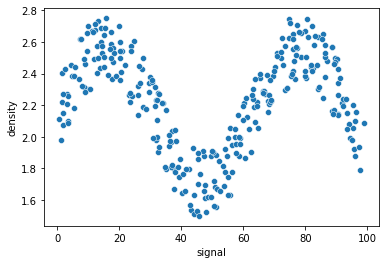

In [7]:
sns.scatterplot(x='signal',y='density',data=df)

In [8]:
X=df['signal'].values.reshape(-1,1)
y=df['density']

## train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=101,test_size=0.10)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model=LinearRegression()

In [13]:
lr_model.fit(X_train,y_train) 

LinearRegression()

In [14]:
prends=lr_model.predict(X_test)

In [15]:
prends

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test,prends)

In [17]:
mean_absolute_error(y_test,prends)

0.211198973318633

In [18]:
np.sqrt(mean_squared_error(y_test,prends))

0.2570051996584629

In [19]:
signal_range= np.arange(1,100)
signal_prends= lr_model.predict((signal_range.reshape(-1,1)))

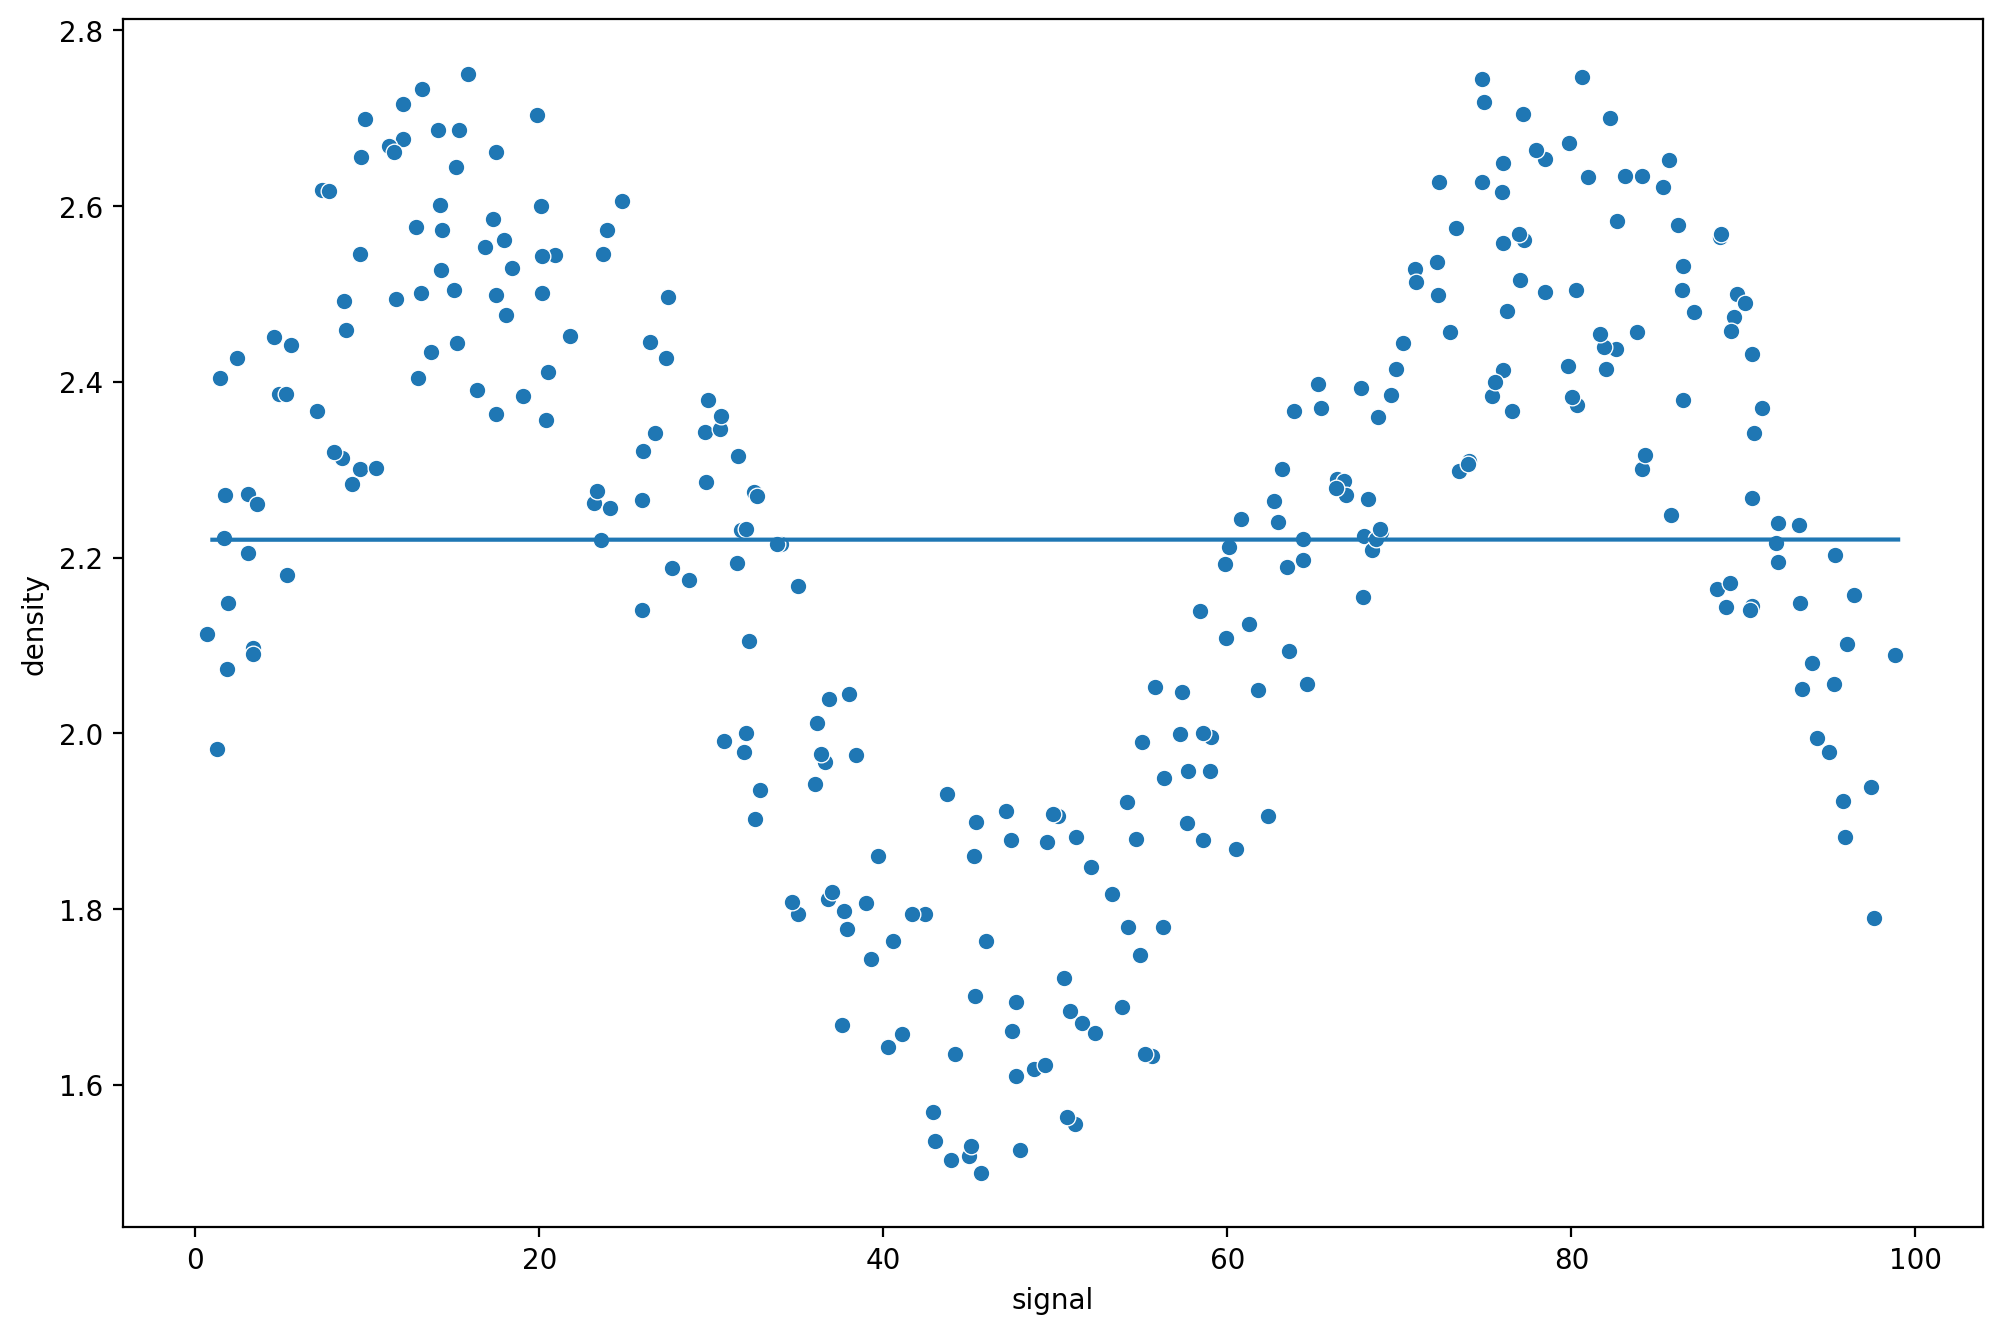

In [20]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='signal',y='density',data=df)
plt.plot(signal_range,signal_prends)

## Polynomial Regression 

In [21]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='signal',y='density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


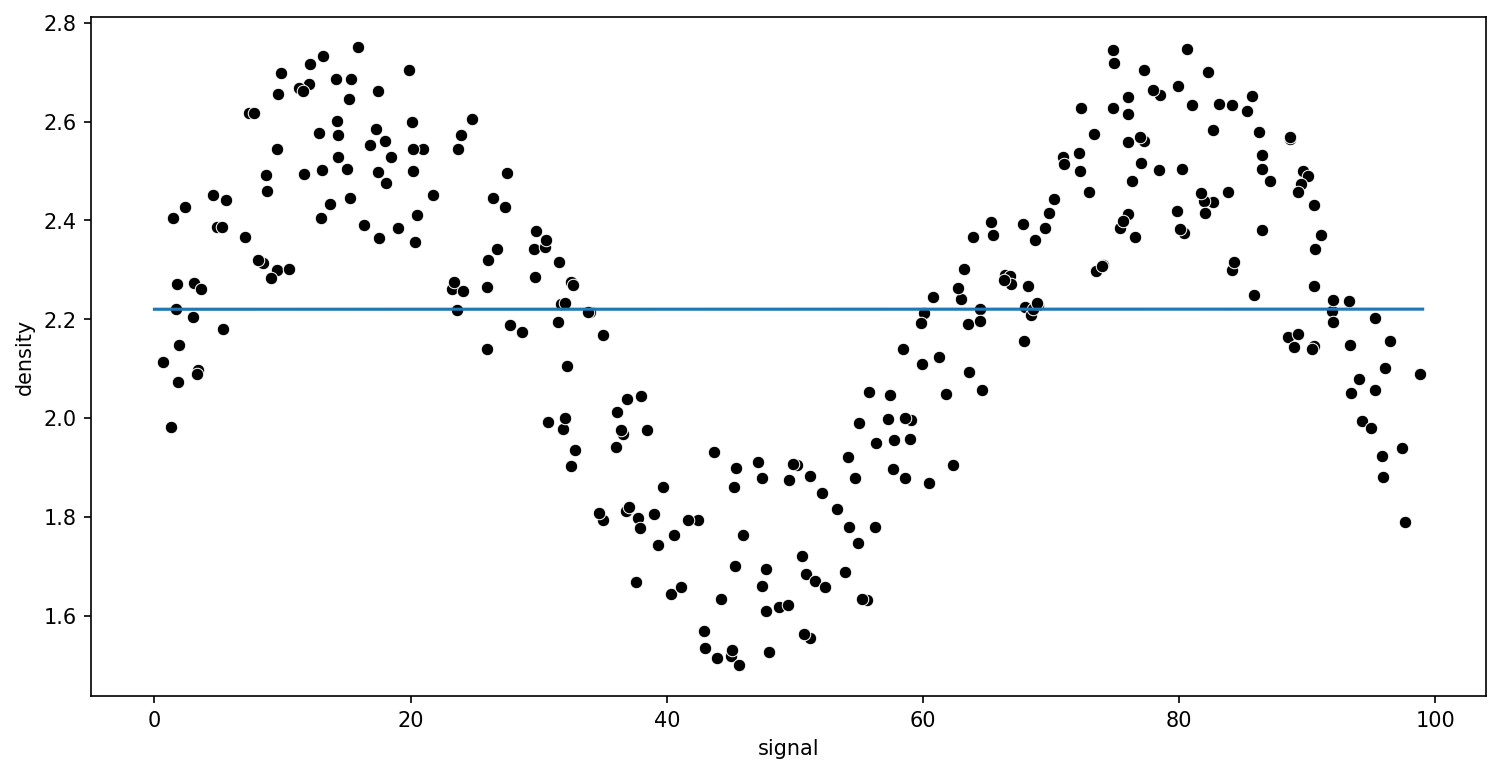

In [22]:
model=LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [24]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

RMSE : 0.28173095637255463


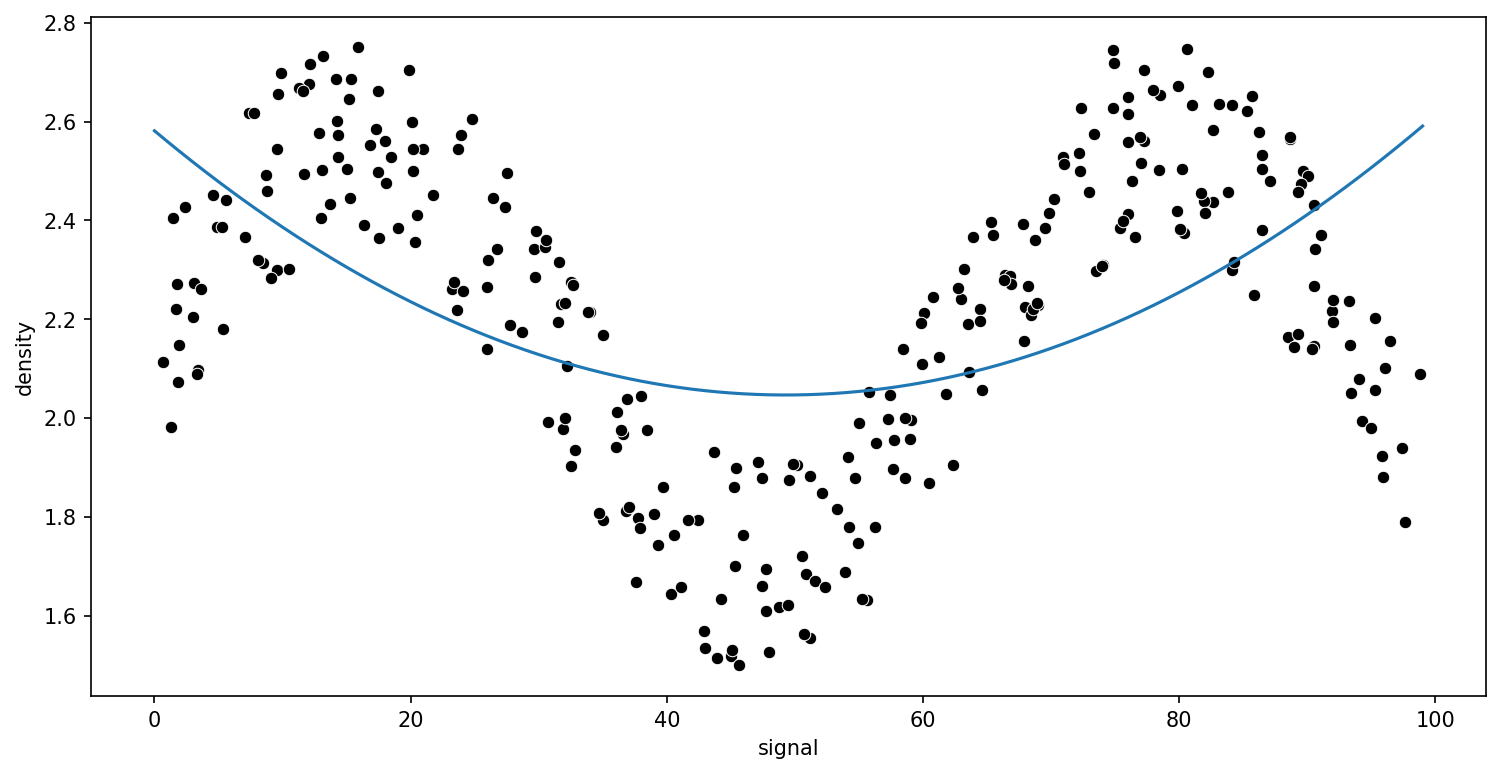

In [25]:
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.1403484368648054


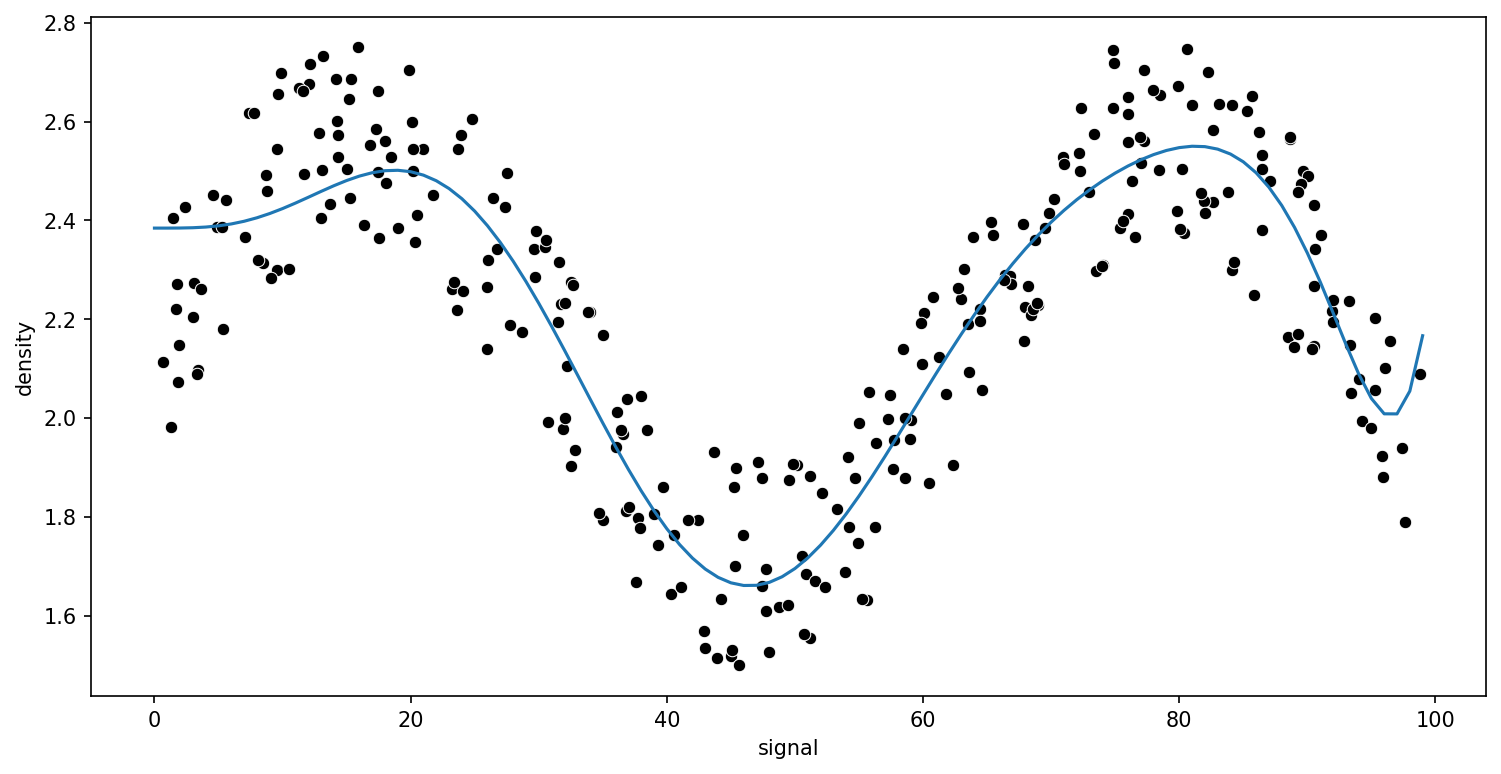

In [26]:
#order 10 polynomial
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## K NN REGRESSION

In [27]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


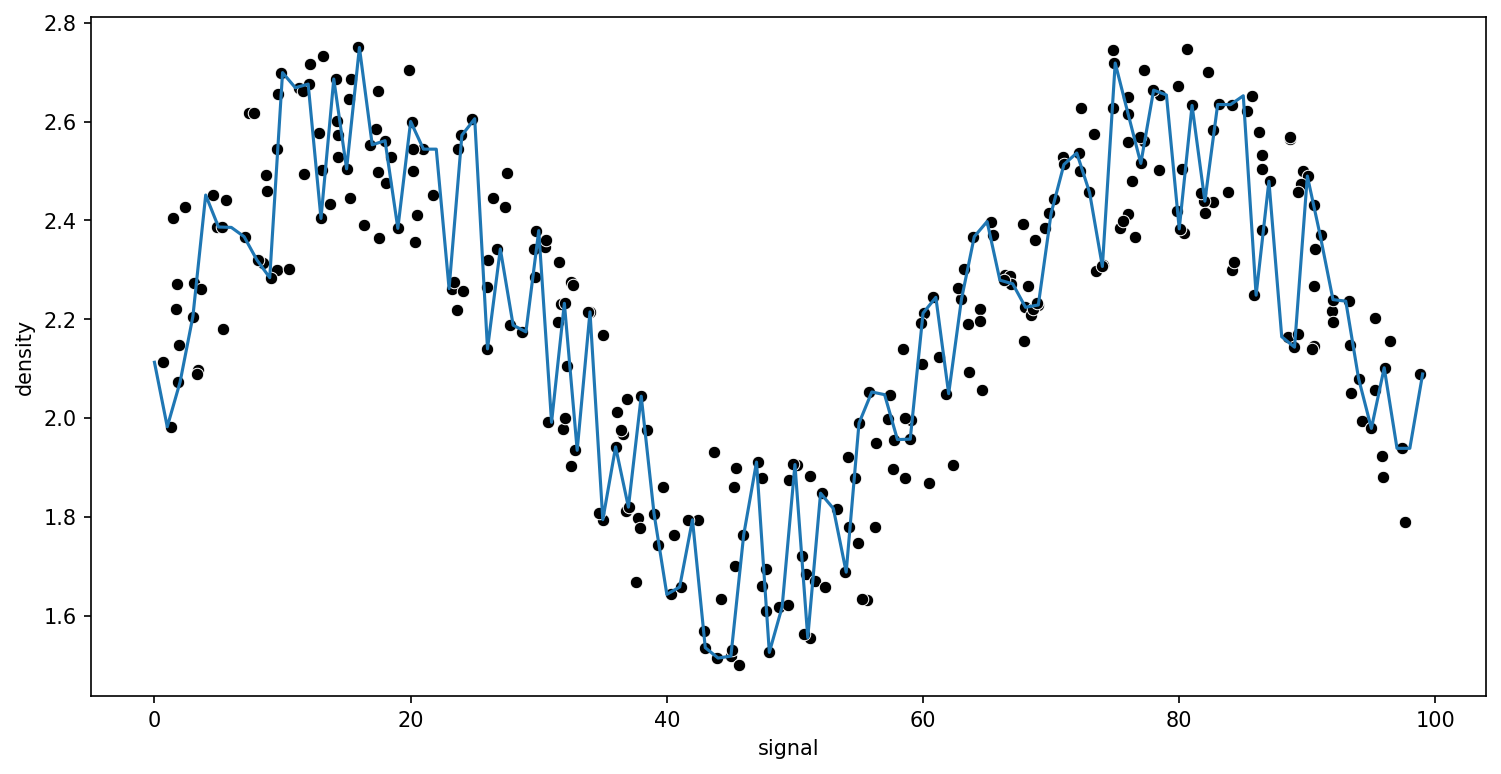

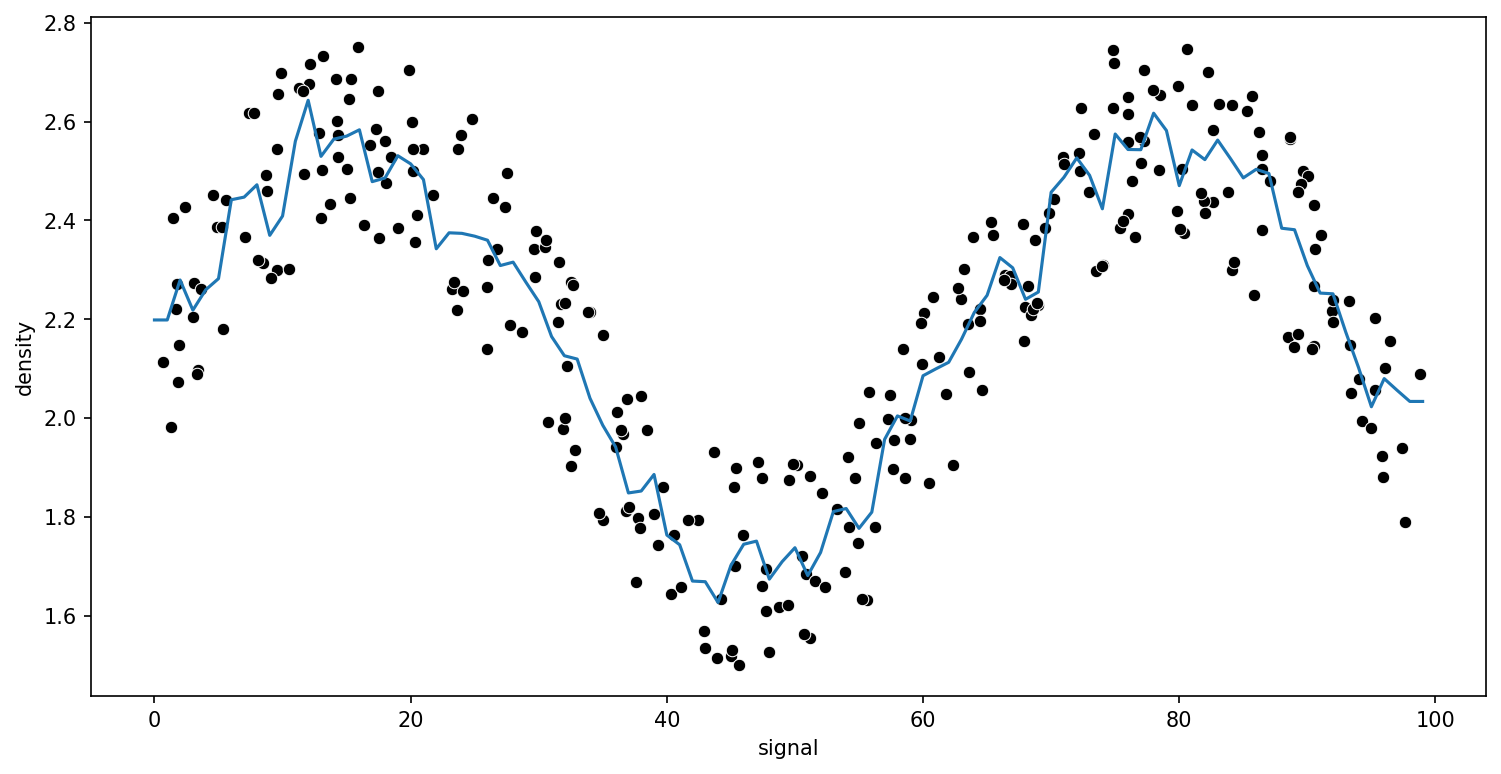

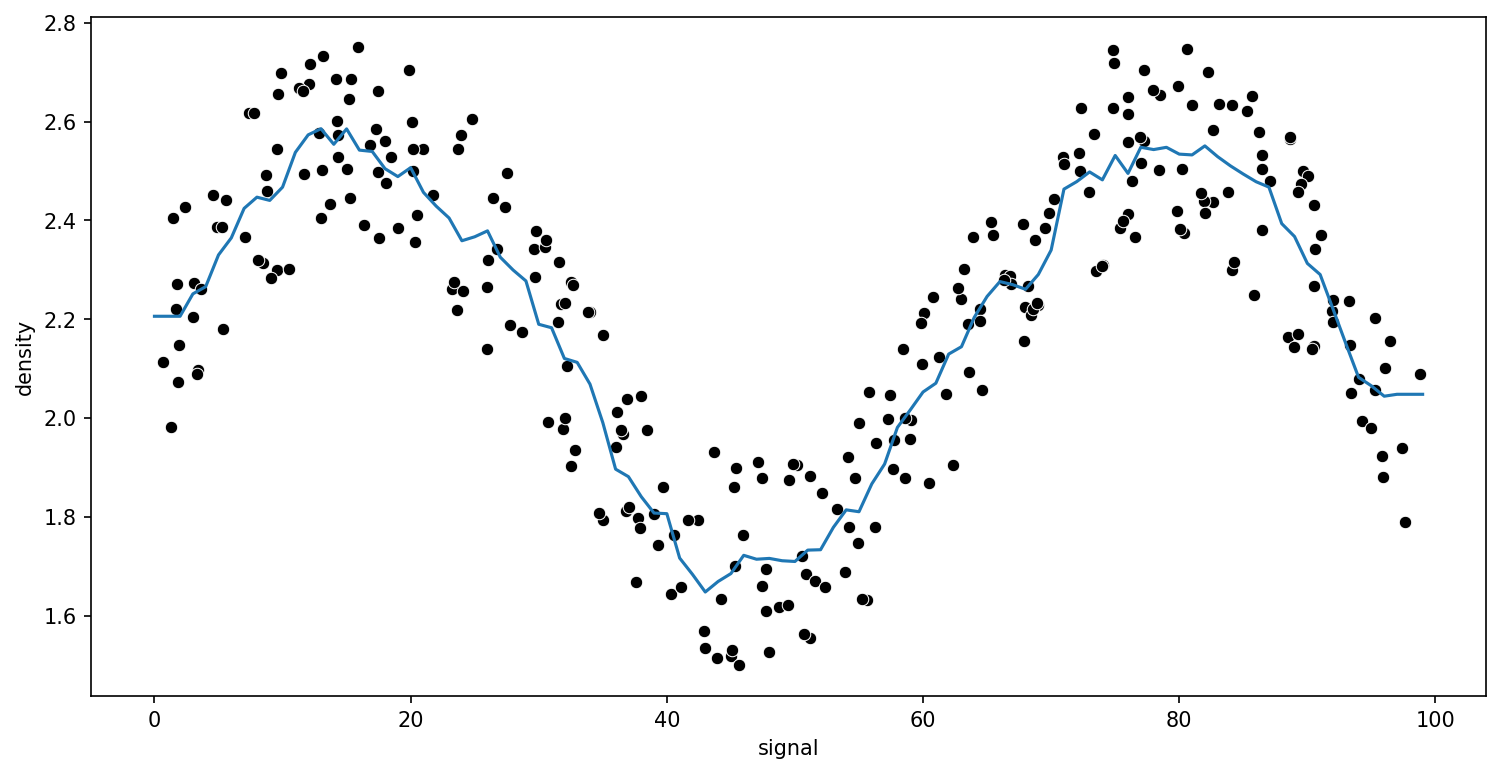

In [28]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.1523487028635337


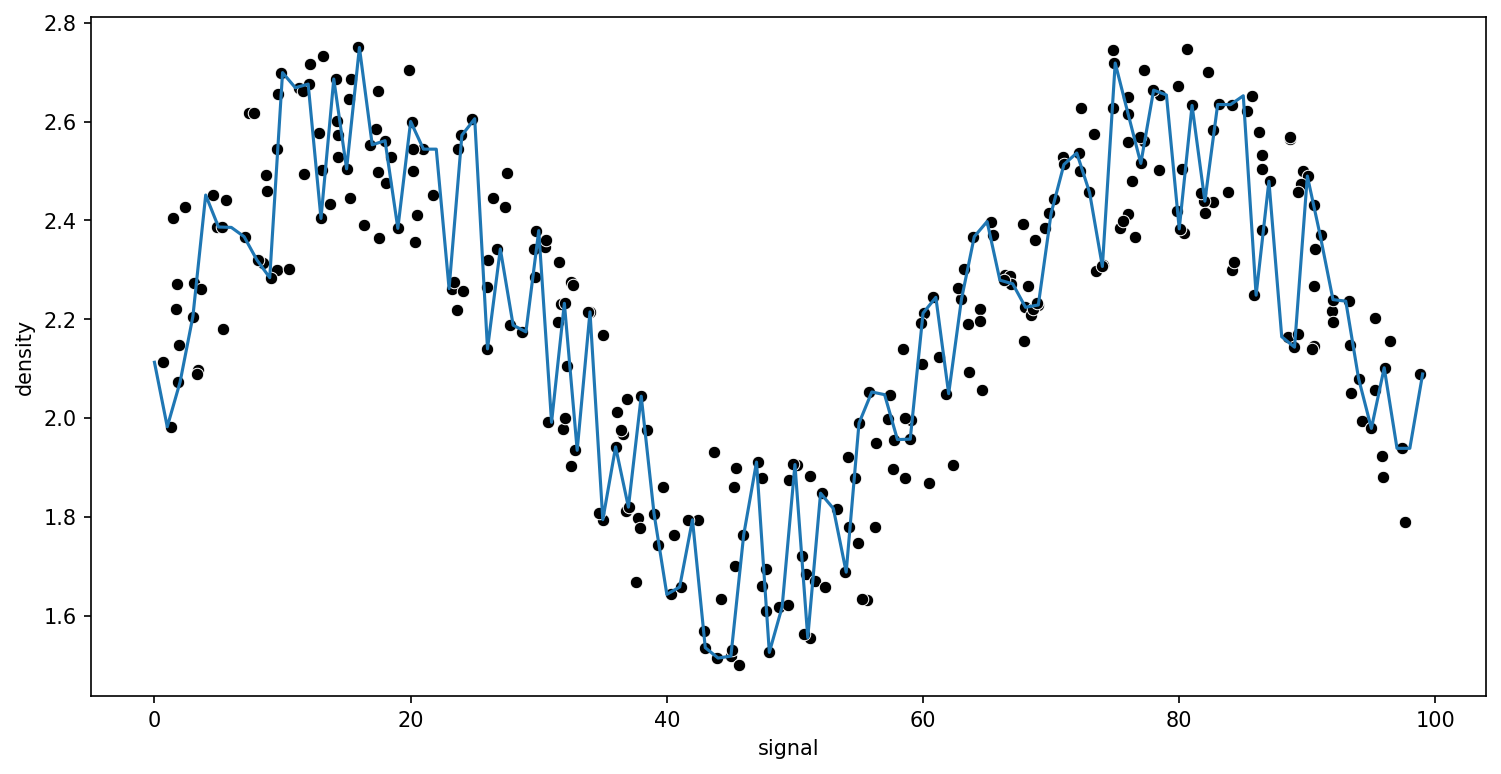

In [30]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [31]:
model.get_n_leaves()

270

## RANDOM FOREST REGRESSION

In [32]:
from sklearn.ensemble import RandomForestRegressor

RMSE : 0.12800254279689882
RMSE : 0.13430224182906314
RMSE : 0.1315422269712179


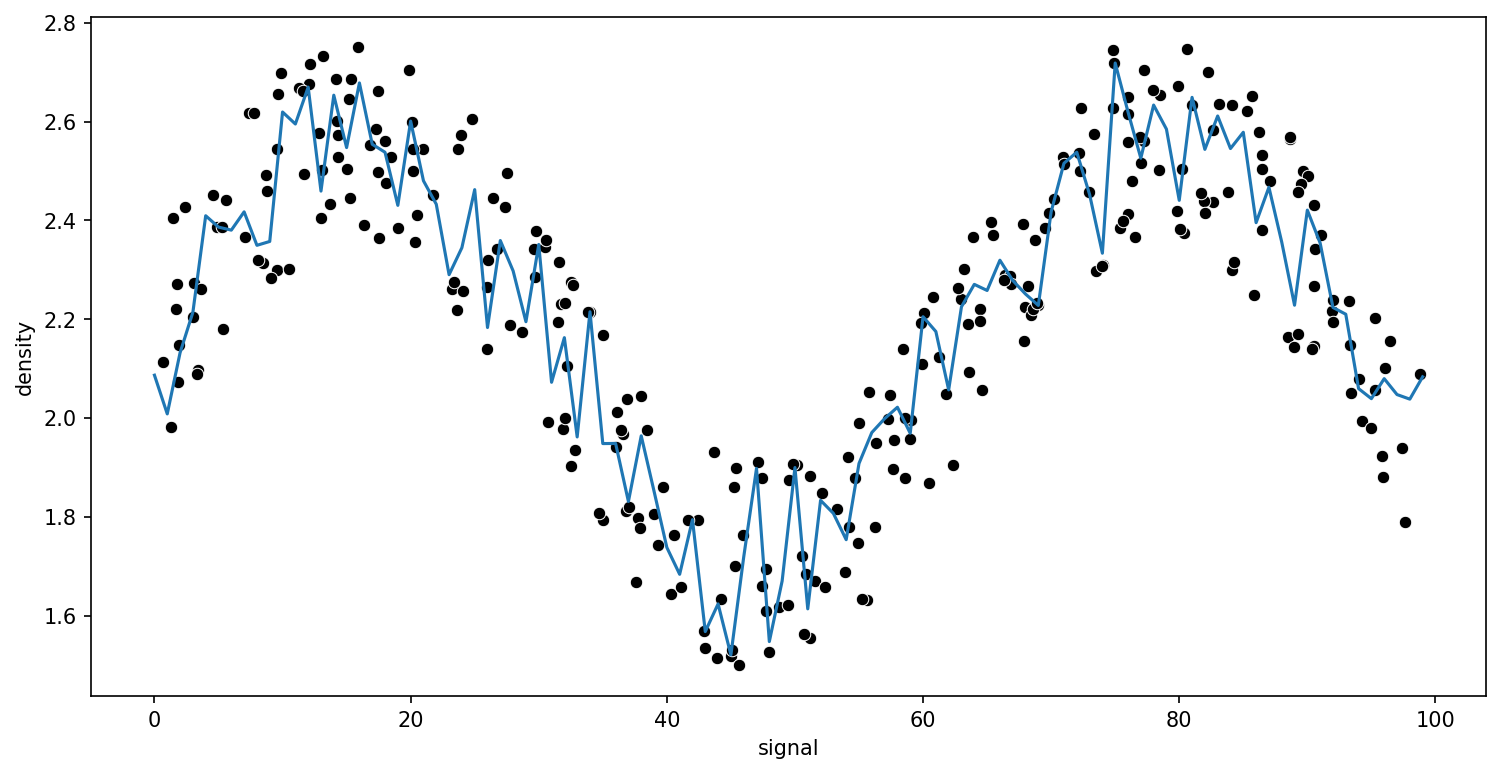

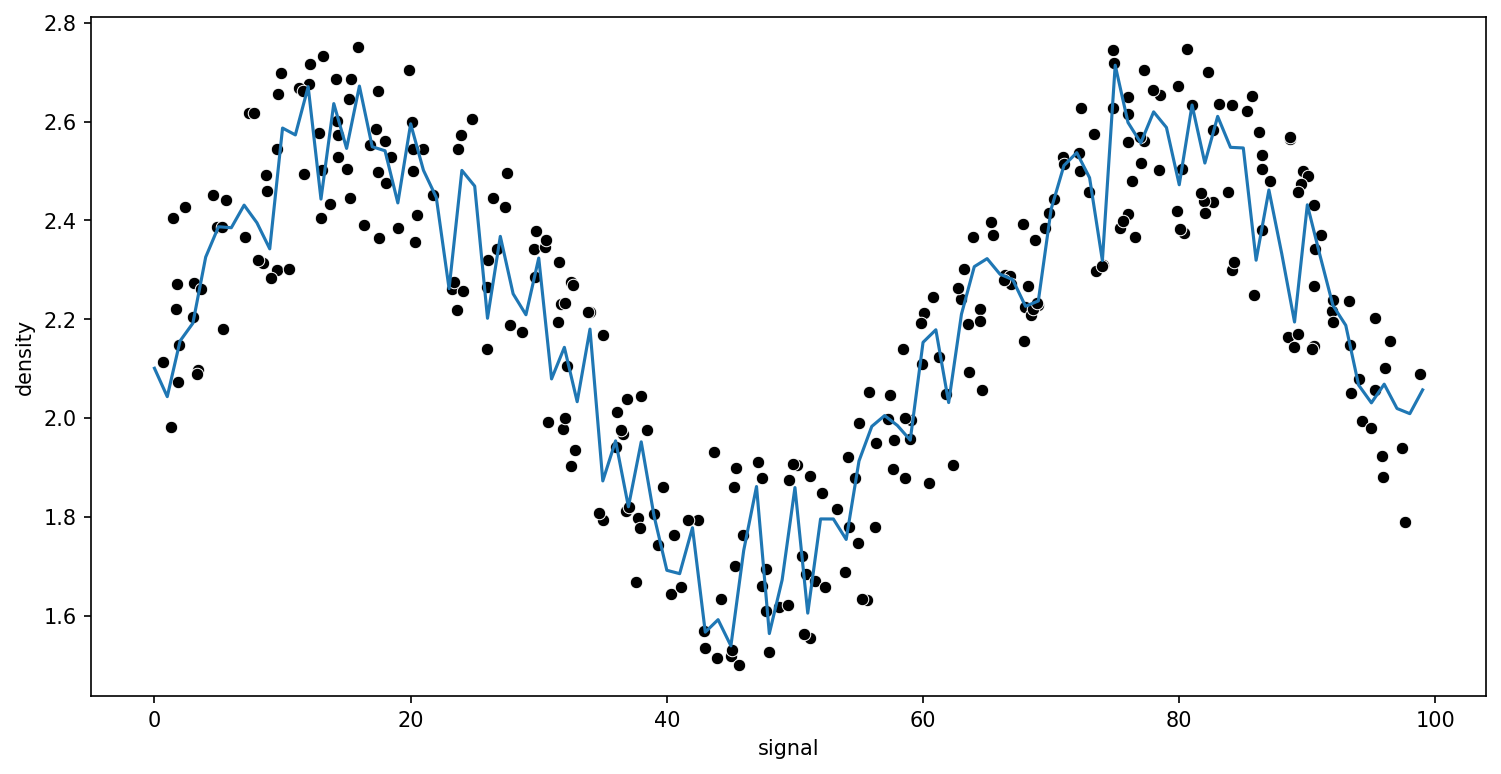

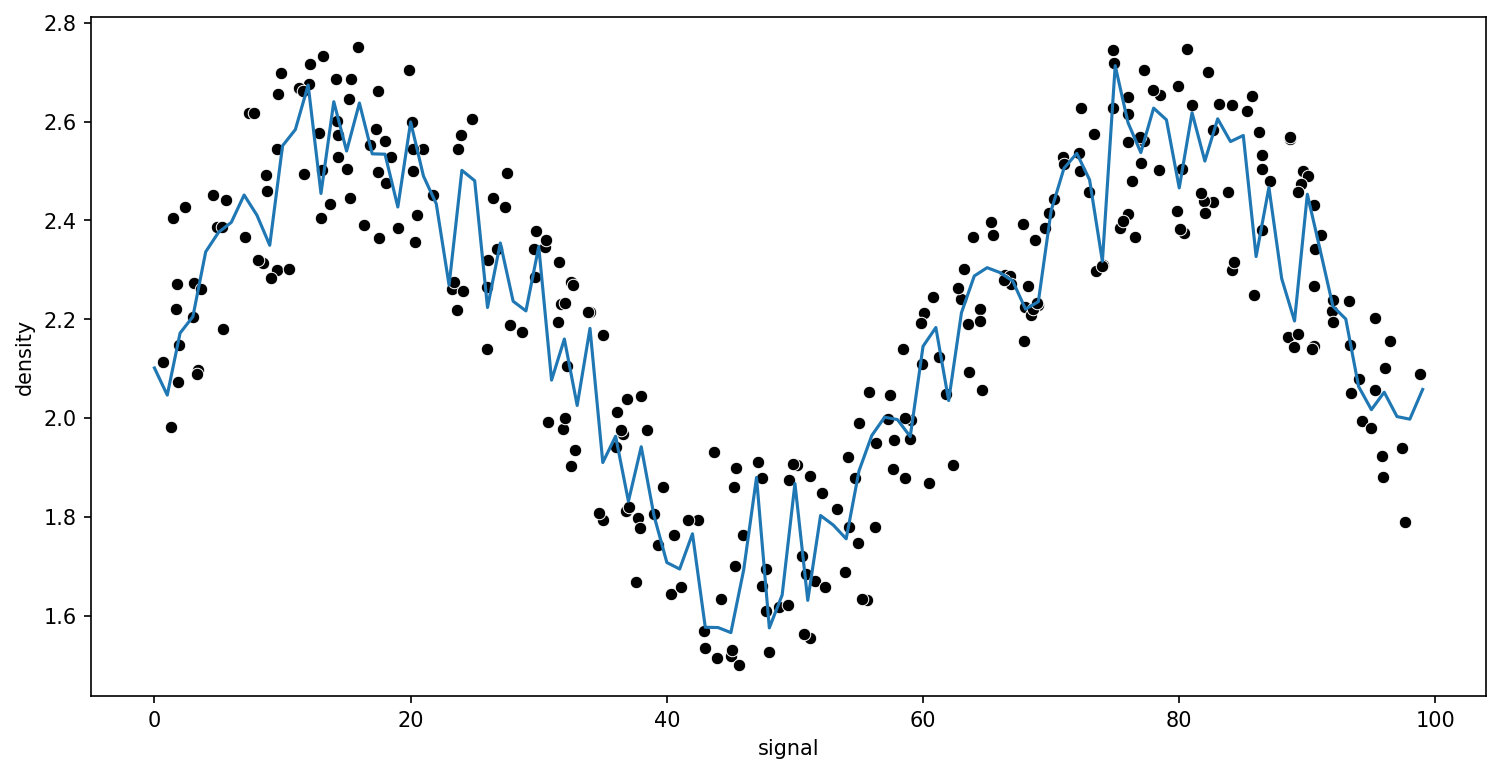

In [33]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)